In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


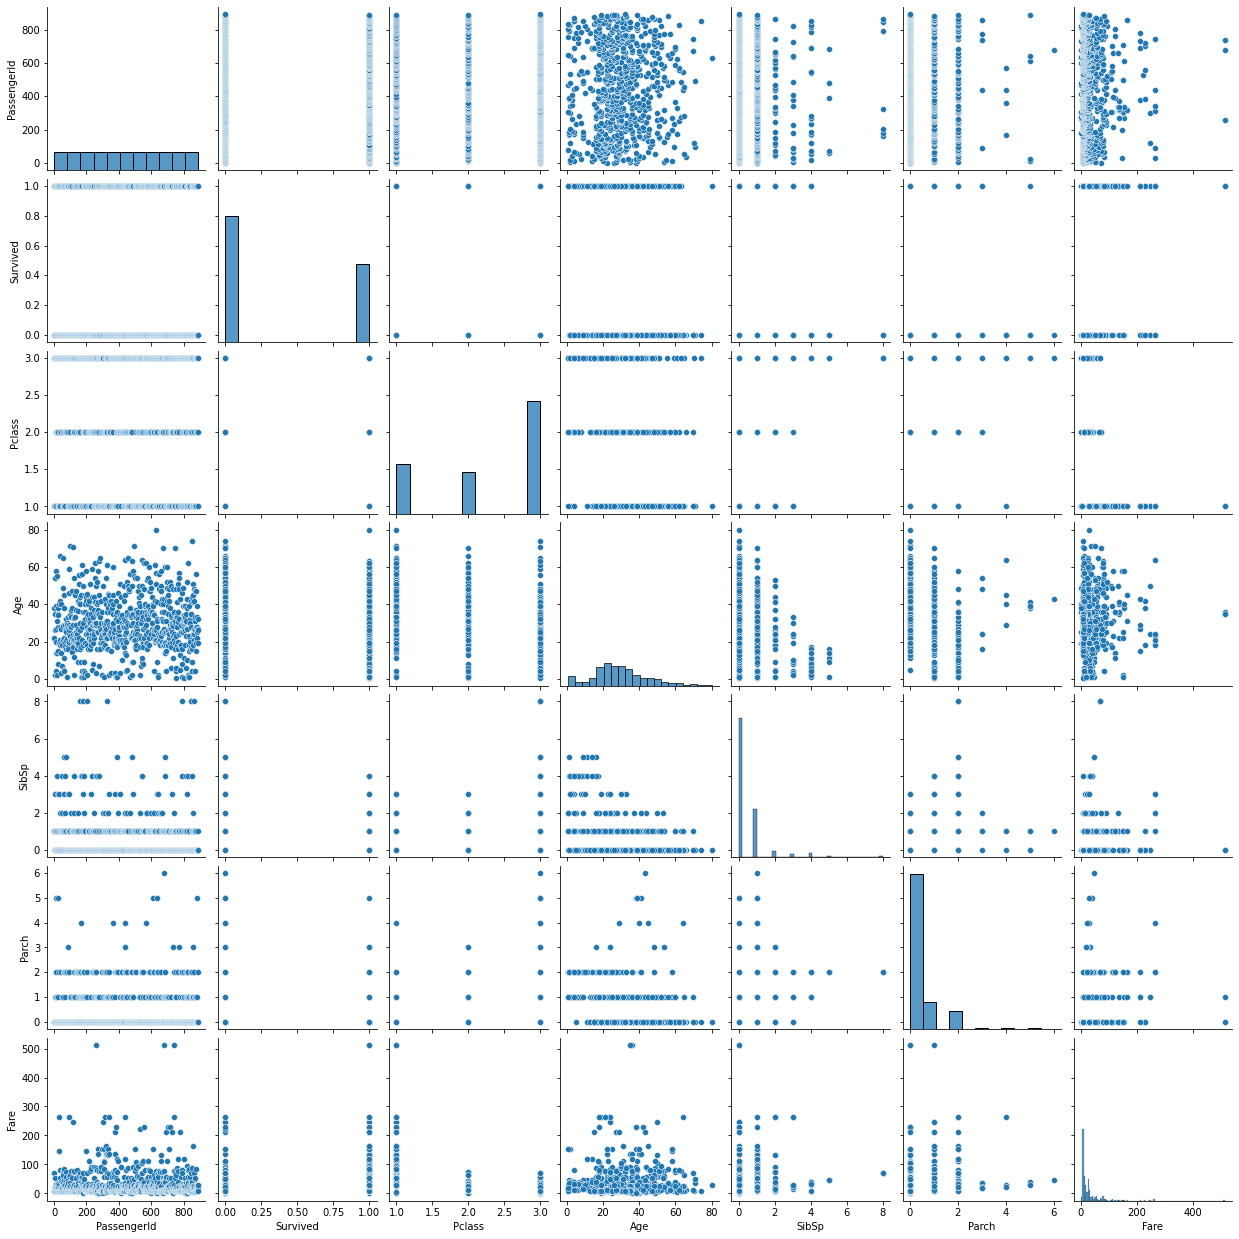

In [3]:
sns.pairplot(train_data)

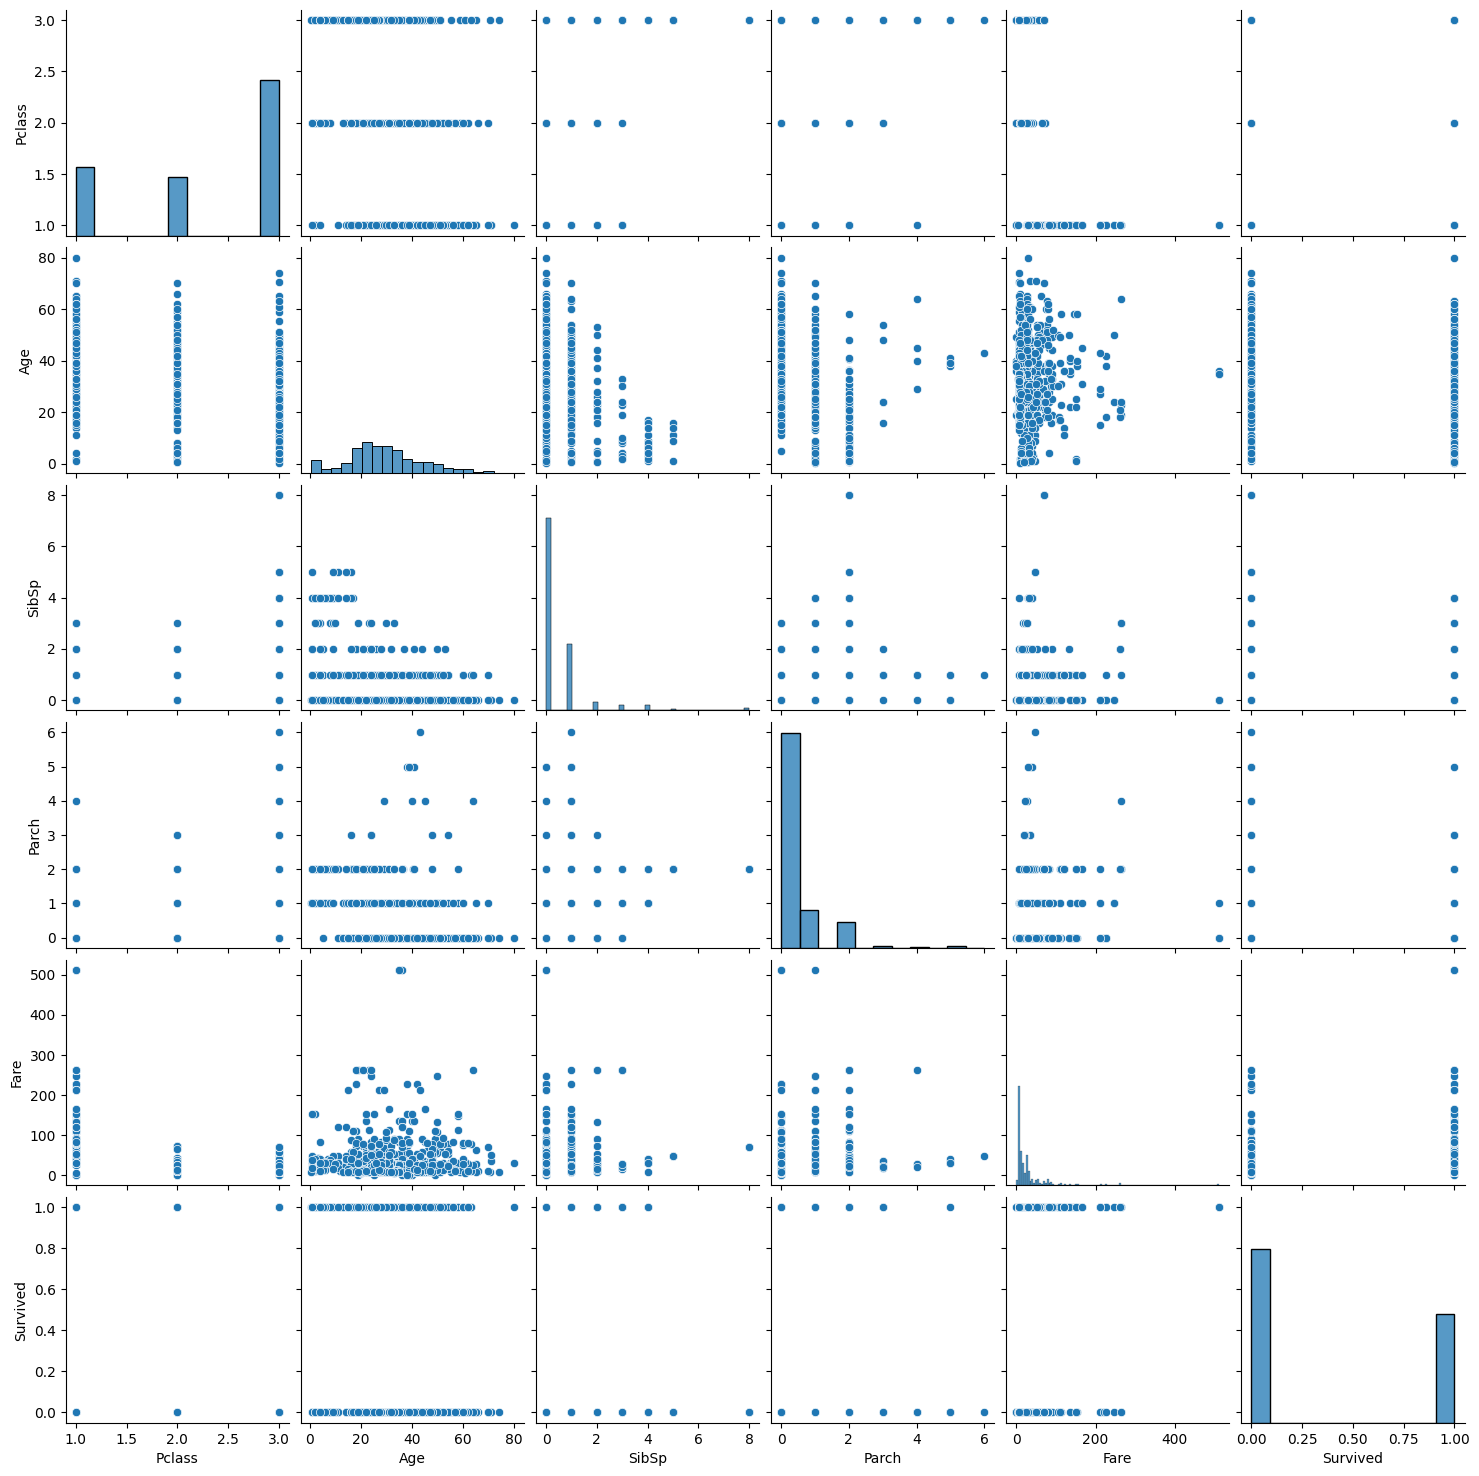

In [4]:
train_data = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
sns.pairplot(train_data)

In [5]:
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [6]:
sex = pd.get_dummies(train_data["Sex"])
embark = pd.get_dummies(train_data["Embarked"])
pclass = pd.get_dummies(train_data["Pclass"])

# sex.head()
# embark.head()
# pclass.head()

train_data.drop(["Sex", "Embarked", "Pclass"], axis=1, inplace=True)

train_data = pd.concat([train_data, sex, embark, pclass], axis=1)
train_data

/var/folders/8z/55l94x3x37n9ygtwrznbq37r0000gn/T/ipykernel_4590/473217715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["Sex", "Embarked", "Pclass"], axis=1, inplace=True)


,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,1,2,3
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1,0,1,0
887,19.0,0,0,30.0000,1,1,0,0,0,1,1,0,0
888,NaN,1,2,23.4500,0,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,1,0,1,1,0,0,1,0,0


In [7]:
train_data[train_data["Age"].isna()]

,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,1,2,3
5,NaN,0,0,8.4583,0,0,1,0,1,0,0,0,1
17,NaN,0,0,13.0000,1,0,1,0,0,1,0,1,0
19,NaN,0,0,7.2250,1,1,0,1,0,0,0,0,1
26,NaN,0,0,7.2250,0,0,1,1,0,0,0,0,1
28,NaN,0,0,7.8792,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,NaN,0,0,7.2292,0,0,1,1,0,0,0,0,1
863,NaN,8,2,69.5500,0,1,0,0,0,1,0,0,1
868,NaN,0,0,9.5000,0,0,1,0,0,1,0,0,1
878,NaN,0,0,7.8958,0,0,1,0,0,1,0,0,1


In [8]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)

In [9]:
train_data.isna().any()

Age         False
SibSp       False
Parch       False
Fare        False
Survived    False
female      False
male        False
C           False
Q           False
S           False
1           False
2           False
3           False
dtype: bool

In [10]:
import DataPreprocessor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


train_data = pd.read_csv("titanic_train.csv")

train_data = DataPreprocessor.process(train_data)
X, y = train_data.drop("Survived", axis=1), train_data['Survived']

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=345)

model = LogisticRegression()

# Train
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_cv)

# Evaluation
print(classification_report(y_cv, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       175
           1       0.73      0.70      0.71        93

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268



/Users/mohamed/Documents/Coding/Machine Learning/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/mohamed/Documents/Coding/Machine Learning/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohamed/Documents/Coding/Machine Learning/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names t

In [13]:
test_data = pd.read_csv("titanic_test.csv")
test_data.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [14]:
test_data[test_data["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [25]:
test_data.dropna(subset="Fare", inplace=True)
test_data[test_data["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
